In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as rfc
import lightgbm as lgb

# Data Acquisition#

In [2]:
Train_Data = pd.read_csv("/content/train.csv")
Train_Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
Test_Data = pd.read_csv("/content/test.csv")
Test_Data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
Train_Data.shape

(891, 12)

In [5]:
Test_Data.shape

(418, 11)

#Data Exploration#

In [6]:
Train_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
Test_Data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
Train_Data.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [9]:
Test_Data.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [10]:
# Checking the data types of all the columns
Train_Data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
Test_Data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# no missing values
Train_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
Test_Data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
#show the percentage of null values in the whole column

Train_Data.isnull().mean() * 100


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [15]:
#Drop the column Cabin as it has a 70 % null values
#drop unnecessary columns
Train_Data.drop(columns=['Cabin','PassengerId','Name','Ticket'], axis=1, inplace=True)
Test_Data.drop(columns=['Cabin','PassengerId','Name','Ticket'], axis=1, inplace=True)

In [16]:
Train_Data['Age'] = Train_Data['Age'].fillna(Train_Data['Age'].mean())


In [17]:
Test_Data['Age'] = Test_Data['Age'].fillna(Test_Data['Age'].mean())


In [18]:
Test_Data.isnull().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [19]:
#Drop the null values in Embarked column as it show just 0.22% of the values
Train_Data = Train_Data.dropna(subset=['Embarked'])


In [20]:
#Drop the null values in Embarked column as it show just 0.22% of the values
Test_Data = Test_Data.dropna(subset=['Embarked'])


In [21]:
#Drop the null values in Embarked column as it show just 0.22% of the values
Test_Data = Test_Data.dropna(subset=['Fare'])

In [22]:
Train_Data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
Test_Data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
Train_Data.duplicated().sum()

111

In [25]:
Test_Data.duplicated().sum()

38

In [26]:
# Drop duplicate rows
Train_Data = Train_Data.drop_duplicates()

In [27]:
# Drop duplicate rows
Test_Data = Test_Data.drop_duplicates()

In [28]:
# #transform the age column from float type to int
Train_Data['Age'] = pd.to_numeric(Train_Data['Age'], errors='coerce').fillna(0).astype(int)
Train_Data.dtypes


Survived      int64
Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [29]:
# #transform the age column from float type to int
Test_Data['Age'] = pd.to_numeric(Test_Data['Age'], errors='coerce').fillna(0).astype(int)
Test_Data.dtypes

Pclass        int64
Sex          object
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder
lb_Embarked=LabelEncoder()
#lb_Ticket=LabelEncoder()
lb_Sex=LabelEncoder()
Train_Data.Embarked=lb_Embarked.fit_transform(Train_Data.Embarked)
#Train_Data.Ticket=lb_Ticket.fit_transform(Train_Data.Ticket)
Train_Data.Sex=lb_Sex.fit_transform(Train_Data.Sex)



In [31]:
Test_Data.Embarked=lb_Embarked.transform(Test_Data.Embarked)
#Test_Data.Ticket=lb_Ticket.transform(Test_Data.Ticket)
Test_Data.Sex=lb_Sex.transform(Test_Data.Sex)

In [32]:
# Embarked column (C = 0, Q = 1, S = 2)
# Sex column (Male = 1, Female = 0)
Train_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


In [33]:
Test_Data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7.8292,1
1,3,0,47,1,0,7.0000,2
2,2,1,62,0,0,9.6875,1
3,3,1,27,0,0,8.6625,2
4,3,0,22,1,1,12.2875,2


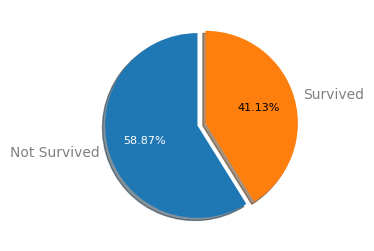

In [34]:
values = Train_Data.Survived.value_counts()
labels = ['Not Survived', 'Survived']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

<Axes: >

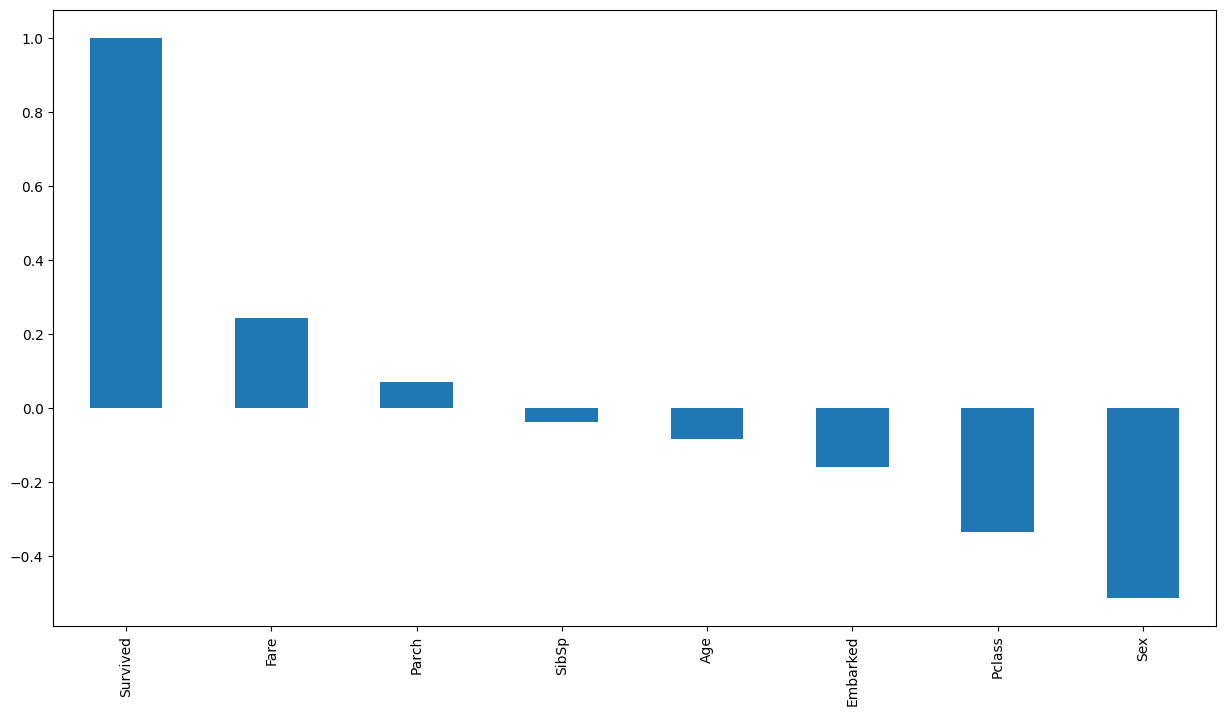

In [35]:
#Get Correlation of "Survived" with other variables:
plt.figure(figsize=(15,8))
Train_Data.corr()['Survived'].sort_values(ascending = False).plot(kind='bar')

**What factors were most likely lead to success-socio-economic status, age, gender and more ?**
Age: Suggests a minor negative correlation.
Sex: These factors have longer bars extending to the left, suggesting a more substantial negative impact on success.

In [36]:
Train_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,778.0,0.411311,0.492388,0.0,0.00,0.0,1.0000,1.0000
Pclass,778.0,2.249357,0.853206,1.0,1.00,3.0,3.0000,3.0000
Sex,778.0,0.627249,0.483848,0.0,0.00,1.0,1.0000,1.0000
Age,778.0,29.634961,13.684547,0.0,21.25,29.0,36.0000,80.0000
SibSp,778.0,0.526992,0.988956,0.0,0.00,0.0,1.0000,8.0000
Parch,778.0,0.419023,0.839346,0.0,0.00,0.0,1.0000,6.0000
Fare,778.0,34.712987,52.280326,0.0,8.05,15.9,33.8906,512.3292
Embarked,778.0,1.526992,0.805334,0.0,1.00,2.0,2.0000,2.0000


In [37]:
Test_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,379.0,2.216359,0.851793,1.0,1.000,2.0000,3.0000,3.0000
Sex,379.0,0.620053,0.486015,0.0,0.000,1.0000,1.0000,1.0000
Age,379.0,30.168865,13.174972,0.0,22.000,30.0000,36.0000,76.0000
SibSp,379.0,0.485488,0.926777,0.0,0.000,0.0000,1.0000,8.0000
Parch,379.0,0.432718,1.022284,0.0,0.000,0.0000,0.0000,9.0000
Fare,379.0,38.152946,58.020997,0.0,7.925,15.2458,36.8771,512.3292
Embarked,379.0,1.401055,0.868374,0.0,0.000,2.0000,2.0000,2.0000


In [38]:
Train_Data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39,0,5,29.1250,1
887,1,1,0,19,0,0,30.0000,2
888,0,3,0,29,1,2,23.4500,2
889,1,1,1,26,0,0,30.0000,0


#Spliting the Data#

In [39]:
train_features = Train_Data.drop(["Survived"], axis=1)

train_labels = Train_Data["Survived"]

In [40]:
test_features = Test_Data

In [41]:
Test_Data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7.8292,1
1,3,0,47,1,0,7.0000,2
2,2,1,62,0,0,9.6875,1
3,3,1,27,0,0,8.6625,2
4,3,0,22,1,1,12.2875,2
...,...,...,...,...,...,...,...
411,1,0,37,1,0,90.0000,1
412,3,0,28,0,0,7.7750,2
414,1,0,39,0,0,108.9000,0
415,3,1,38,0,0,7.2500,2


##Random Forest##


In [42]:
#The following script trains the model using Random Forest algorithm:

rfc_object = rfc(n_estimators=200, random_state=0)

rfc_object.fit(train_features, train_labels)
RF_label_pred = rfc_object.predict(test_features)

In [43]:
RF_label_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [44]:
# build the lightgbm model
clf = lgb.LGBMClassifier()
clf.fit(train_features, train_labels)
# predict the results
LGBM_label_pred=clf.predict(test_features)

[LightGBM] [Info] Number of positive: 320, number of negative: 458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 217
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411311 -> initscore=-0.358548
[LightGBM] [Info] Start training from score -0.358548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [45]:
LGBM_label_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(LGBM_label_pred,RF_label_pred)

0.9129287598944591

In [47]:
# importing required libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# seperate the independent and target variable on training data
train_x = Train_Data.drop(columns=['Survived'],axis=1)
train_y = Train_Data['Survived']

# seperate the independent and target variable on testing data
test_x = Test_Data
# test_y = test_data['Survived']

model = XGBClassifier()

# fit the model with the training data
model.fit(train_x,train_y)


# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test)

# Accuracy Score on test dataset
# accuracy_test = accuracy_score(test_y,predict_test)
# print('\naccuracy_score on test dataset : ', accuracy_test)


Target on train data [0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1
 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0
 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1
 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1
 1 